In [ ]:
Problem Statement
Farmers who grow potatoes suffer from serious financial standpoint losses each year which cause several diseases 
that affect potato plants. The diseases Early Blight and Late Blight 
are the most frequent.

Early blight is a disease of potato caused by the fungus Alternaria solani. It is found wherever potatoes are grown. 
The disease primarily affects leaves and stems, but under favorable weather conditions, and if left uncontrolled, can 
result in considerable defoliation and enhance the chance for tuber infection.

Late blight caused by the Phytophthora infestans is the most important disease of potato that can result into crop 
failures in a short period if appropriate control measures are not adopted.

Early blight is caused by fungus and late blight is caused by specific micro-organisms and if farmers detect this
disease early and apply appropriate treatment then it can save a lot of waste and prevent economical loss. The treatments
for early blight and late blight are a little different so it’s important that you accurately identify what kind of
disease is there in that potato plant.

Our Goal is to classify the the type of disease in the potato plant Thus, we have three classes

Healthy
Early Blight
Late Blight

In [1]:
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Constant values that we are going to use 
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3 #RGB
EPOCHS = 20

In [3]:
df_p='C:\\Nanduzz\\sTudY\\ML\\Machine Learning\\DeepLearning\\CNN\\plant\\PlantVillage\\train'
dt_p='C:\\Nanduzz\\sTudY\\ML\\Machine Learning\\DeepLearning\\CNN\\plant\\PlantVillage\\test'

In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from keras.layers import Convolution2D

In [5]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    df_p,
    shuffle="True",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)


Found 1514 files belonging to 3 classes.


In [6]:
class_name=df.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(df)

48

here 68 is the number of batches and batch size is 32 so total length of dataset is 68*32

In [8]:
for image_batch,label_batch in df.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 0 0 0 2 1 2 0 1 0 0 0 0 0 1 2 0 0 0 1 1 0 1 1 0 1 0 0 1]


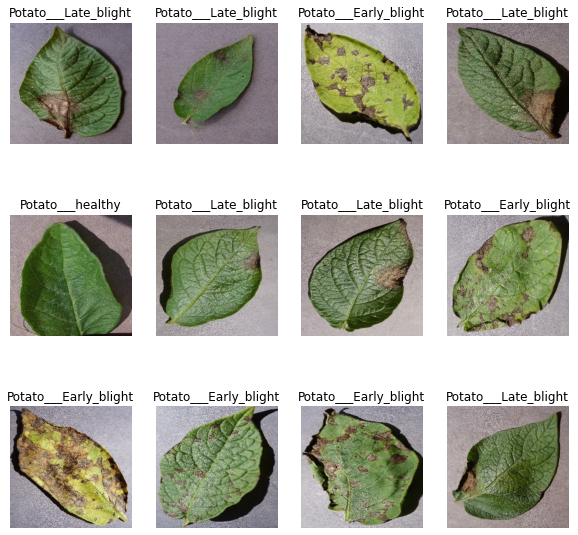

In [9]:
# Some images of both the diseases
plt.figure(figsize=(10,10))
for image_batch,label_batch in df.take(1):
    for i in range(0,12):
        ax = plt.subplot(3,4,i+1)
        plt.title(class_name[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

## Data Preparation and Model Training:
Used splitfolders tool to split dataset into training, validation and test directories.

In [10]:

#pip install split-folders


In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_gen= ImageDataGenerator(rescale=1/255,rotation_range=10,horizontal_flip=True)
test_gen=ImageDataGenerator(rescale=1/255,rotation_range=10,horizontal_flip=True)

In [15]:
train_generator = train_gen.flow_from_directory(
        df_p,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="training\\AugmentedImages"
)

Found 1514 images belonging to 3 classes.


In [16]:
test_generator = train_gen.flow_from_directory(
        dt_p,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="training\\AugmentedImages"
)

Found 638 images belonging to 3 classes.


In [18]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

## Model Architecture
We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

We are going to use convolutional neural network (CNN) here. CNN is popular for image classification tasks.

In [19]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3


In [21]:
seq=models.Sequential([layers.InputLayer(input_shape=input_shape),
                      layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
                      layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                      layers.MaxPooling2D((2,2)),
                      layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                      layers.MaxPooling2D((2,2)),
                      layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                      layers.MaxPooling2D((2,2)),
                      layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                      layers.MaxPooling2D((2,2)),
                      layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                      layers.MaxPooling2D((2,2)),
                      layers.Flatten(),
                        layers.Dense(64,activation='relu'),
                       layers.Dense(n_classes,activation='softmax') 
                      ])

In [22]:
seq.build(input_shape=input_shape)

In [23]:
seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)      

## Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [24]:
seq.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [28]:
history=seq.fit(train_generator,epochs=20,batch_size=32,validation_data=test_generator,steps_per_epoch=47,verbose=1)

Epoch 1/20
48/48 [==============================] - 80s 2s/step - loss: 0.7997 - accuracy: 0.5773 - val_loss: 0.5852 - val_accuracy: 0.7288
Epoch 2/20
48/48 [==============================] - 75s 2s/step - loss: 0.5546 - accuracy: 0.7490 - val_loss: 0.4486 - val_accuracy: 0.8103
Epoch 3/20
48/48 [==============================] - 76s 2s/step - loss: 0.4470 - accuracy: 0.8144 - val_loss: 0.3700 - val_accuracy: 0.8574
Epoch 4/20
48/48 [==============================] - 74s 2s/step - loss: 0.3343 - accuracy: 0.8692 - val_loss: 0.2992 - val_accuracy: 0.8824
Epoch 5/20
48/48 [==============================] - 74s 2s/step - loss: 0.2549 - accuracy: 0.9016 - val_loss: 0.2509 - val_accuracy: 0.9075
Epoch 6/20
48/48 [==============================] - 86s 2s/step - loss: 0.2332 - accuracy: 0.9055 - val_loss: 0.2657 - val_accuracy: 0.8903
Epoch 7/20
48/48 [==============================] - 74s 2s/step - loss: 0.1956 - accuracy: 0.9287 - val_loss: 0.3780 - val_accuracy: 0.8527
Epoch 8/20
48/48 [==

In [29]:
scores = seq.evaluate(test_generator)


20/20 [==============================] - 12s 574ms/step - loss: 0.0599 - accuracy: 0.9781


#### You can see above that we get 97% accuracy for our test dataset. This is considered to be a pretty good accuracy